#  Task 1 : THE SPARKS FOUNDATION MAY'21

**Topic: Prediction using Supervised ML**

**Description**: Predict the percentage of an student based on the no. of study hours.
             What will be predicted score if a student studies for 9.25 hrs/ day?

**Dataset Used**: http://bit.ly/w-data

**Done By** : Subham Saha, Data Science and Business Analytics Intern May'21 
        

### Importing necessary libraries

In [1]:
import pandas as pd #read dataframe eg. excel,csv files 
import numpy as np # linear algebra
import matplotlib.pyplot as plt #plotting graphs
%matplotlib inline 
import sklearn #machine learning predictions
print("libraries imported successfully")

libraries imported successfully


### Importing Dataset

In [2]:
url="http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")
df.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Insights from data

In [3]:
df.shape # no of rows and columns

(25, 2)

In [4]:
df.describe() #basic information about data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.info() #checking for null values values and data type of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Plotting the variables to find any relationships between them**

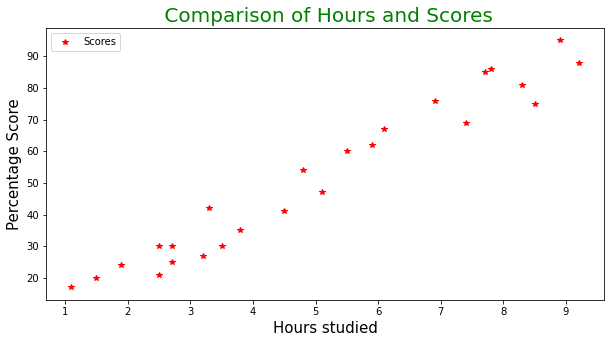

In [6]:
df.plot(x="Hours",y="Scores",style='*',legend=True,figsize=(10,5),color='r')
plt.title(" Comparison of Hours and Scores",{"size": 20, "color":"green"})
plt.xlabel("Hours studied",size=15)
plt.ylabel("Percentage Score",size=15)
plt.show()

### Inference from the graph

From the graph above, we can observe that there is a clear positive linear realtionship between the 2 variables 'Hours' and 'Scores'.

### Data cleaning

In [7]:
df_2=df.isnull().sum() # No missing value present in data
print("Data cleaning done successfully")
df_2

Data cleaning done successfully


Hours     0
Scores    0
dtype: int64

### Pre-processing the data

In [8]:
# splitting into inputs and outputs where X is the matrix and y is the vector

X= (df['Hours'].values).reshape(-1,1)
y= df["Scores"].values


In [9]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [10]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

**Splitting the data into test and train datasets**

In [11]:
#using scikitlearn library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=15)
print("Splitting complete")

Splitting complete


In [12]:
len(X_train),len(X_test)

(20, 5)

### Training the model

In [13]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(X_train,y_train)
print("Training complete")

Training complete


In [14]:
print("intercept(beta zero) value is: ",reg.intercept_) #if x i.e hours studied becomes zero then also student can score 1.2% score
print('slope coefficient(beta one) value is:',reg.coef_)# for every unit of x increases y increase by 9.9 units

intercept(beta zero) value is:  3.0734693877550967
slope coefficient(beta one) value is: [9.83774002]


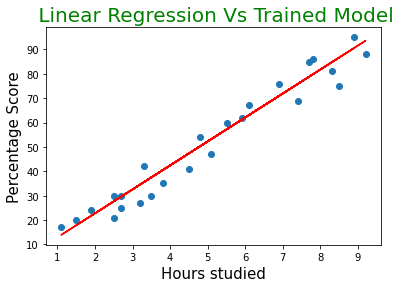

In [15]:
#Plotting the fitting of regression line
reg_line= reg.coef_*X+ reg.intercept_

#Plotting the data
plt.scatter(X,y)
plt.title(" Linear Regression Vs Trained Model",{"size": 20, "color":"green"})
plt.xlabel("Hours studied",size=15)
plt.ylabel("Percentage Score",size=15)
plt.plot(X,reg_line,color='r')
plt.show()

Inference: After plotting the regression line we can observe that its a positive trend and we got intercept value of 1.28
           and coefficient of slope 9.9. 

# Prediction time

In [16]:
y_pred= reg.predict(X_test) #Predicting scores
y_pred

array([27.66781944, 40.45688147, 34.55423746, 53.2459435 , 93.58067759])

In [17]:
df_pred= pd.DataFrame({'Actual': y_test,'Predicted Scores': y_pred })
df_pred

,Actual,Predicted Scores
0,30,27.667819
1,35,40.456881
2,27,34.554237
3,47,53.245944
4,88,93.580678


### Accuracy of the Model

In [18]:
reg.score(X_test,y_test) #score method will compare the values of both columns and we got a 93.5% score for our model which is good

0.9350556142184708

Inference: Our acuuracy for the model is around 93.5%

### Evaluating The Model by Error

In [19]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 5.433984115813812


### Predicting scores for random hours

In [20]:
hours=([9.25,9.5,9.7,9.8])
hours=pd.DataFrame(hours)
y_pred_new= reg.predict(hours)
y_pred_new= pd.DataFrame(y_pred_new)
df_new= pd.concat([hours,y_pred_new],axis=1,keys=[ "Hours","Predicted Scores"])
df_new

,Hours,Predicted Scores
,0,0
0,9.25,94.072565
1,9.50,96.532000
2,9.70,98.499548
3,9.80,99.483322


**Conclusion: If the student studies for 9.25 hours/day, then according to our model he/she can score 94.07%**